In [107]:
#pip install folium


In [108]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [109]:
df= pd.read_csv('LA-ABNB.csv')

C:\Users\chenl\AppData\Local\Temp\ipykernel_26948\3055578653.py:1: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('LA-ABNB.csv')


In [110]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,16228948,https://www.airbnb.com/rooms/16228948,20170502172350,2017-05-03,Robert Ranch in Los Angeles for filming/wedding,Stunning Ranch Estate situated on 20 acres and...,NaN,Stunning Ranch Estate situated on 20 acres and...,none,NaN,...,NaN,f,NaN,NaN,t,strict,f,f,1,NaN
1,8909380,https://www.airbnb.com/rooms/8909380,20170502172350,2017-05-03,Nice quiet private ranch house,NaN,Very private and quite . Hiking horse riding a...,Very private and quite . Hiking horse riding a...,none,I'm in the country what's not to love about that,...,9.0,f,NaN,NaN,f,flexible,f,f,1,1.91
2,14078522,https://www.airbnb.com/rooms/14078522,20170502172350,2017-05-03,Room w/private bath on Small Ranch,My place is close to Six Flags Magic Mountain ...,Room with queen bed and private bath,My place is close to Six Flags Magic Mountain ...,none,Horse area. Trails for hiking and riding. Quie...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.72
3,13006928,https://www.airbnb.com/rooms/13006928,20170502172350,2017-05-03,Miller Ranch Bunkhouse,"Our place is close to great views, equestrian ...",Please know that we live on a dirt road but it...,"Our place is close to great views, equestrian ...",none,NaN,...,10.0,f,NaN,NaN,t,flexible,f,f,1,2.12
4,7898757,https://www.airbnb.com/rooms/7898757,20170502172350,2017-05-03,Studio with full bathroom,Fully furnished studio only a 10 min drive fro...,NaN,Fully furnished studio only a 10 min drive fro...,none,NaN,...,10.0,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,1,0.18


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31253 entries, 0 to 31252
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31253 non-null  int64  
 1   listing_url                       31253 non-null  object 
 2   scrape_id                         31253 non-null  int64  
 3   last_scraped                      31253 non-null  object 
 4   name                              31246 non-null  object 
 5   summary                           30417 non-null  object 
 6   space                             21866 non-null  object 
 7   description                       31238 non-null  object 
 8   experiences_offered               31253 non-null  object 
 9   neighborhood_overview             18575 non-null  object 
 10  notes                             13815 non-null  object 
 11  transit                           18164 non-null  object 
 12  acce

In [112]:
df.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.125300e+04,3.125300e+04,3.125300e+04,0.0,31239.000000,31239.000000,0.0,31253.000000,31253.000000,31253.000000,...,31253.000000,23726.000000,23689.000000,23688.000000,23661.000000,23690.000000,23660.000000,23648.000000,31253.000000,24030.000000
mean,1.085829e+07,2.017050e+13,3.632524e+07,NaN,5.171132,5.171132,NaN,34.056220,-118.334252,3.425751,...,20.842543,94.214533,9.612394,9.416456,9.770297,9.768974,9.612933,9.485411,3.546572,1.857360
std,5.527237e+06,3.531306e+00,3.454658e+07,NaN,24.143834,24.143834,NaN,0.101912,0.153783,2.481926,...,38.106641,8.040304,0.789394,0.954680,0.652473,0.658068,0.735289,0.834739,5.551354,2.022831
min,1.090000e+02,2.017050e+13,5.900000e+01,NaN,0.000000,0.000000,NaN,33.338905,-118.911026,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,6.262191e+06,2.017050e+13,7.441819e+06,NaN,1.000000,1.000000,NaN,34.013997,-118.431313,2.000000,...,1.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.410000
50%,1.216199e+07,2.017050e+13,2.471631e+07,NaN,2.000000,2.000000,NaN,34.066607,-118.349465,2.000000,...,6.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.120000
75%,1.570678e+07,2.017050e+13,5.623875e+07,NaN,4.000000,4.000000,NaN,34.103960,-118.267693,4.000000,...,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.730000
max,1.852404e+07,2.017050e+13,1.285513e+08,NaN,855.000000,855.000000,NaN,34.742088,-117.655471,16.000000,...,605.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,49.000000,90.000000


In [113]:
df['neighbourhood'].value_counts()

Mid-Wilshire             1909
Hollywood                1850
Venice                   1653
West Hollywood            994
Long Beach                787
                         ... 
West Rancho Dominguez       1
Artesia                     1
Lenox                       1
Commerce                    1
La Habra                    1
Name: neighbourhood, Length: 159, dtype: int64

In [114]:
df[df.isna().any(axis=1)]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,16228948,https://www.airbnb.com/rooms/16228948,20170502172350,2017-05-03,Robert Ranch in Los Angeles for filming/wedding,Stunning Ranch Estate situated on 20 acres and...,NaN,Stunning Ranch Estate situated on 20 acres and...,none,NaN,...,NaN,f,NaN,NaN,t,strict,f,f,1,NaN
1,8909380,https://www.airbnb.com/rooms/8909380,20170502172350,2017-05-03,Nice quiet private ranch house,NaN,Very private and quite . Hiking horse riding a...,Very private and quite . Hiking horse riding a...,none,I'm in the country what's not to love about that,...,9.0,f,NaN,NaN,f,flexible,f,f,1,1.91
2,14078522,https://www.airbnb.com/rooms/14078522,20170502172350,2017-05-03,Room w/private bath on Small Ranch,My place is close to Six Flags Magic Mountain ...,Room with queen bed and private bath,My place is close to Six Flags Magic Mountain ...,none,Horse area. Trails for hiking and riding. Quie...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.72
3,13006928,https://www.airbnb.com/rooms/13006928,20170502172350,2017-05-03,Miller Ranch Bunkhouse,"Our place is close to great views, equestrian ...",Please know that we live on a dirt road but it...,"Our place is close to great views, equestrian ...",none,NaN,...,10.0,f,NaN,NaN,t,flexible,f,f,1,2.12
4,7898757,https://www.airbnb.com/rooms/7898757,20170502172350,2017-05-03,Studio with full bathroom,Fully furnished studio only a 10 min drive fro...,NaN,Fully furnished studio only a 10 min drive fro...,none,NaN,...,10.0,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,1,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31248,18445825,https://www.airbnb.com/rooms/18445825,20170502172350,2017-05-03,"Gorgeous Huge bedroom with Extra,s",Our bedroom features a california King bed wit...,Luxury bathroom access to man cave and many ex...,Our bedroom features a california King bed wit...,none,Neighborhood is very safe centrally located ar...,...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN
31249,18192212,https://www.airbnb.com/rooms/18192212,20170502172350,2017-05-03,Ocean View Malibu Dream - April Deal $205/night,This newly renovated luxury apartment is great...,NaN,This newly renovated luxury apartment is great...,none,You can't get much better with the neighborhoo...,...,NaN,f,NaN,MALIBU,f,strict,f,f,2,NaN
31250,17339165,https://www.airbnb.com/rooms/17339165,20170502172350,2017-05-03,"Beautifull Villa to Pacific Coastin, Malibu.",*PLEASE do not book before you contact me! All...,NaN,*PLEASE do not book before you contact me! All...,none,NaN,...,NaN,f,NaN,MALIBU,f,flexible,f,f,1,NaN
31251,17827299,https://www.airbnb.com/rooms/17827299,20170502172350,2017-05-03,Entire Lower Level Portion of home,Two Separate Bedroom comfortably fits 4 Adjac...,3000 sqft Split Level home with A Private Lowe...,Two Separate Bedroom comfortably fits 4 Adjac...,none,This neighborhood was an Upscale Tract home de...,...,NaN,f,NaN,NaN,t,moderate,f,f,1,NaN


In [115]:
 df.isna().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   7
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   7223
Length: 95, dtype: int64

In [116]:
df['room_type'].unique()


array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [117]:
empty_columns = df.columns[df.isna().all()].tolist()

if empty_columns:
    print(f"The following columns are entirely empty: {empty_columns}")
else:
    print("There are no entirely empty columns in the DataFrame.")

The following columns are entirely empty: ['host_acceptance_rate', 'neighbourhood_group_cleansed', 'has_availability']


### Remove the dollar sign and convert the column to numeric


In [118]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['weekly_price'] = df['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
df['monthly_price'] = df['monthly_price'].str.replace('$', '').str.replace(',', '').astype(float)
df['security_deposit'] = df['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)

df[['price', 'weekly_price','monthly_price','security_deposit','cleaning_fee']].head()

C:\Users\chenl\AppData\Local\Temp\ipykernel_26948\3869593895.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\chenl\AppData\Local\Temp\ipykernel_26948\3869593895.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['weekly_price'] = df['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\chenl\AppData\Local\Temp\ipykernel_26948\3869593895.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['month

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,3000.0,NaN,NaN,2000.0,200.0
1,50.0,NaN,NaN,NaN,NaN
2,55.0,NaN,NaN,NaN,NaN
3,150.0,NaN,NaN,NaN,35.0
4,30.0,NaN,NaN,NaN,5.0


In [119]:
df['price']

0        3000.0
1          50.0
2          55.0
3         150.0
4          30.0
          ...  
31248      75.0
31249     205.0
31250     500.0
31251      65.0
31252     500.0
Name: price, Length: 31253, dtype: float64

In [120]:
df_new = df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'has_availability'], axis=1)

print(f"num od cols before:{df.shape[1]}")
print(f"num od cols after:{df_new.shape[1]}")

num od cols before:95
num od cols after:92


## Data Analytics and Visualization

In [121]:
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows() if not pd.isna(row['latitude']) and not pd.isna(row['longitude'])]

HeatMap(heat_data, radius=8, blur=4, min_opacity=0.2).add_to(la_map)

la_map.save('la_heatmap.html')

la_map

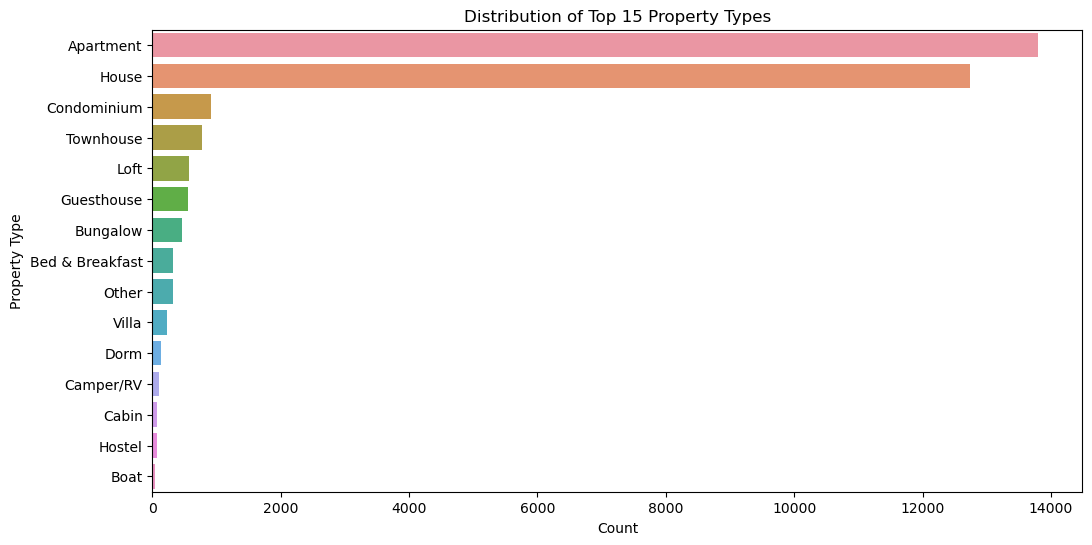

In [122]:
# Top 15 most popular propery type distribution 

# Filter the dataset to include only the top 15 most common property types
top_15_property_types = df['property_type'].value_counts().nlargest(15).index
filtered_df = df[df['property_type'].isin(top_15_property_types)]

# Plot the distribution of the top 15 most common property types
plt.figure(figsize=(12, 6))
sns.countplot(y='property_type', data=filtered_df, order=filtered_df['property_type'].value_counts().index)
plt.title('Distribution of Top 15 Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

Seems like the most common properties are apartments and houses

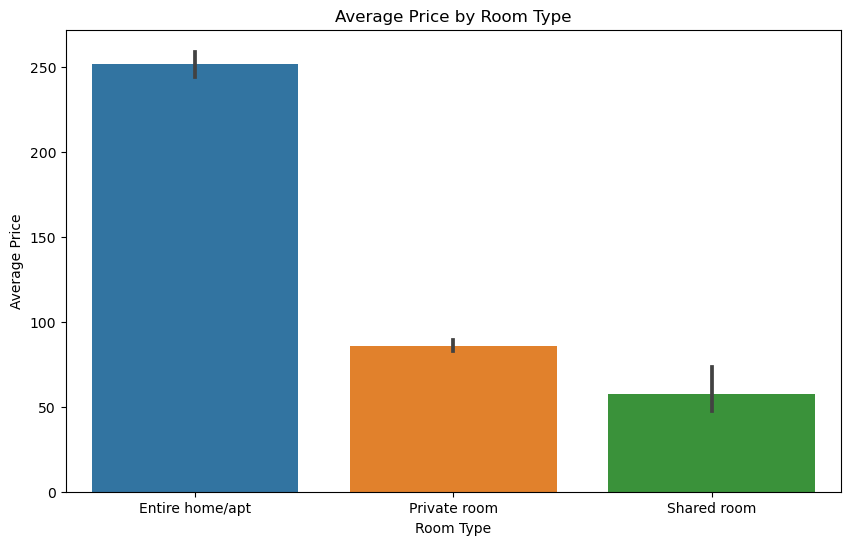

In [123]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=filtered_df)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

Entire homes are more expencive than private rooms and shared rooms

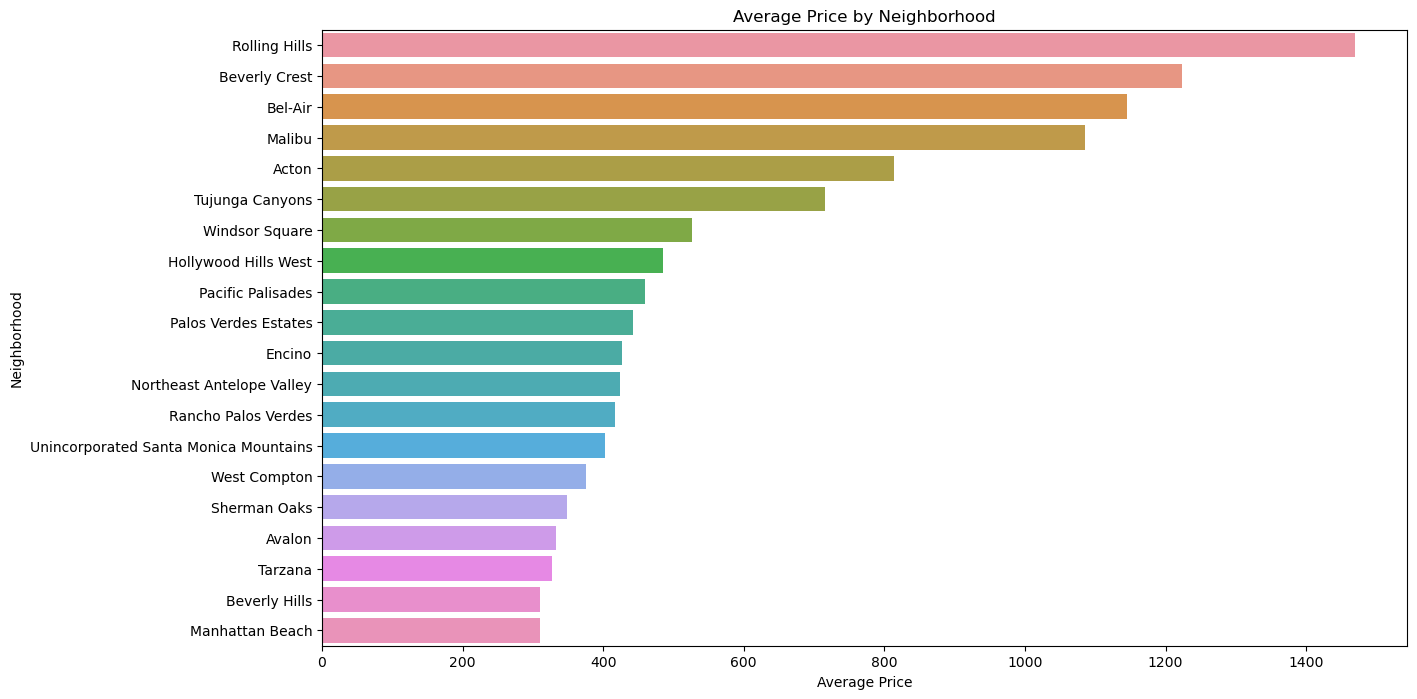

In [124]:
avg_price_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
avg_price_neighborhood = avg_price_neighborhood.dropna()
top_20_neighborhoods = avg_price_neighborhood.nlargest(20, 'price')


# Plot the average price by neighborhood
plt.figure(figsize=(14, 8))
sns.barplot(x='price', y='neighbourhood_cleansed', data=top_20_neighborhoods, order=top_20_neighborhoods.sort_values('price', ascending=False)['neighbourhood_cleansed'])
plt.title('Average Price by Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

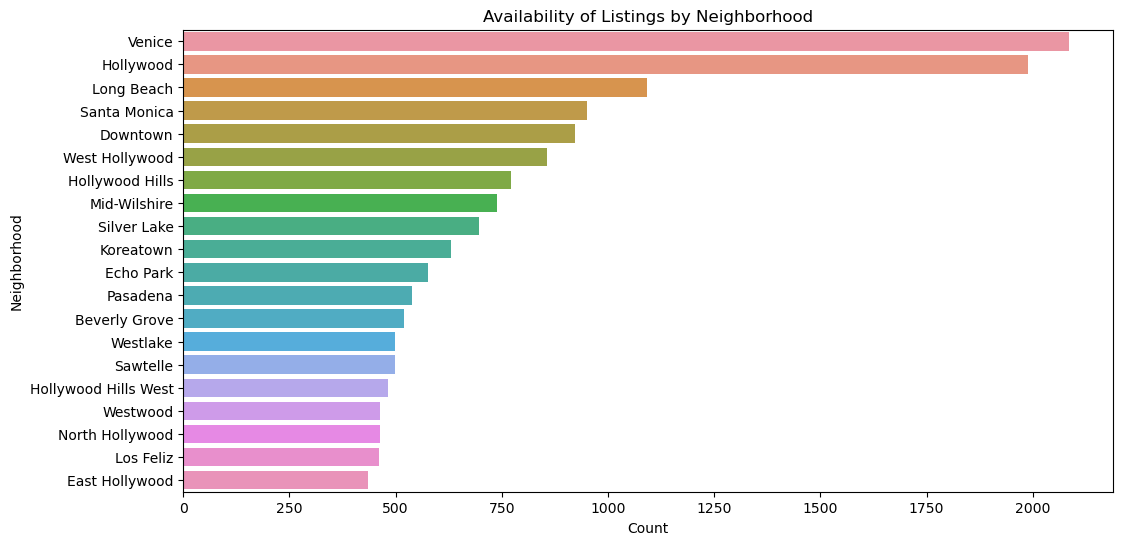

In [125]:
plt.figure(figsize=(12, 6))
sns.countplot(y='neighbourhood_cleansed', data=df, order=df['neighbourhood_cleansed'].value_counts().index[:20])
plt.title('Availability of Listings by Neighborhood')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

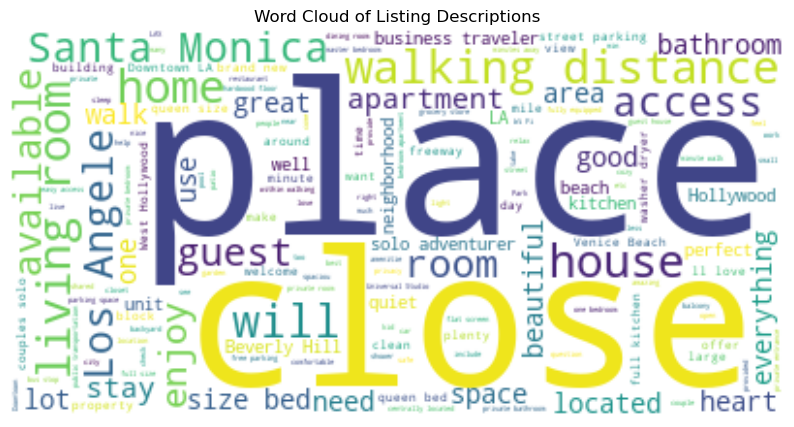

In [126]:
from wordcloud import WordCloud

text = " ".join(desc for desc in df.description.dropna())
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Listing Descriptions')
plt.show()

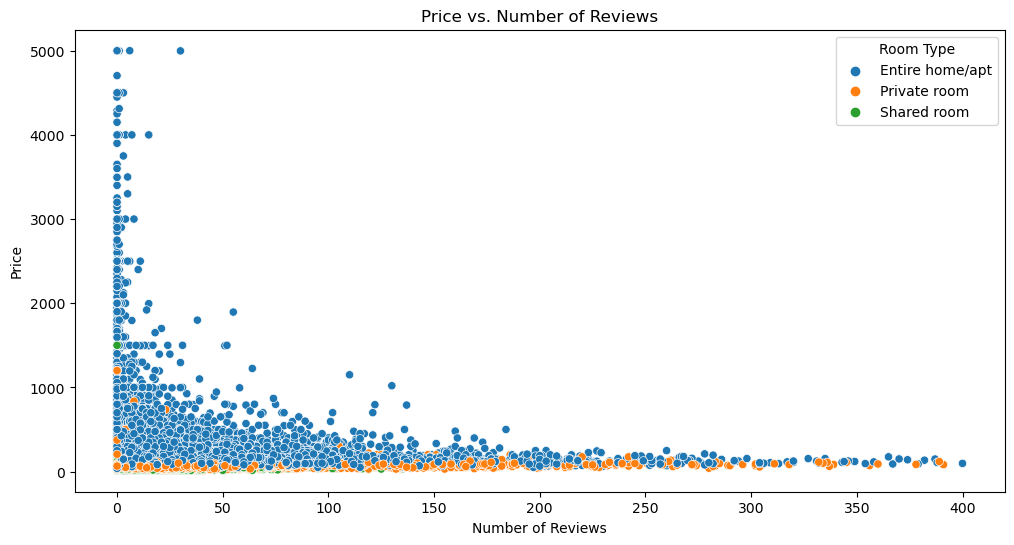

In [127]:
#Ploting price vs number of reviews
reviews_df=df[(df['price'] <= 5000) & (df['number_of_reviews'] <= 400)]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=reviews_df, hue='room_type')

plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

Most apartments cost the average price so more expensive apartments will have less review because les speople visit it.
To better understand the relationship between the average price and the number of reviews, we can calculate the average price for each bucket of the number of reviews and then plot this data. This way, we can see how the average price changes with the number of reviews. 

C:\Users\chenl\AppData\Local\Temp\ipykernel_26948\2680854070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['reviews_bin'] = pd.cut(reviews_df['number_of_reviews'], bins=range(0, 401, 10))


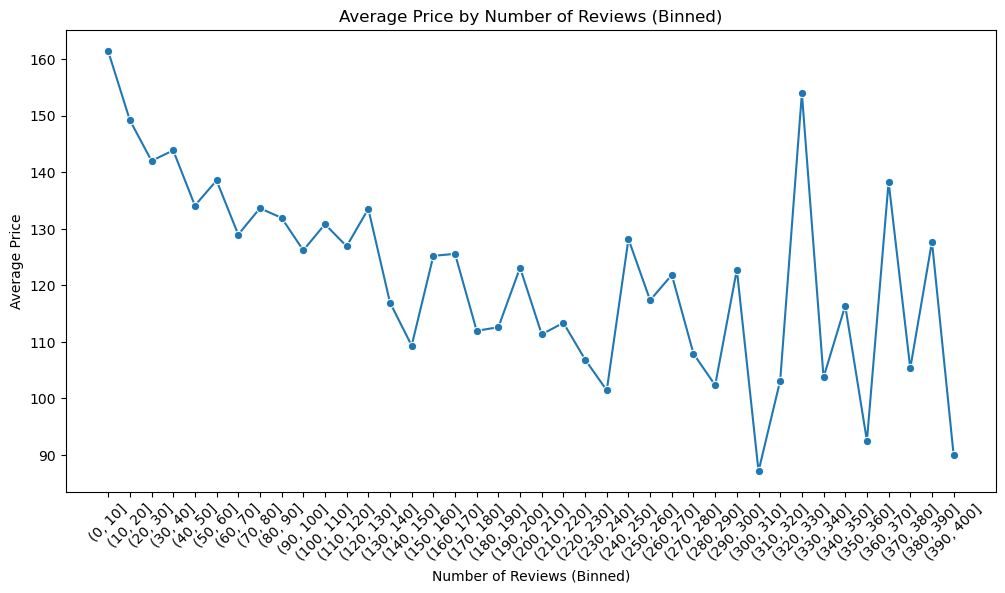

In [128]:
reviews_df = df[(df['price'] <= 5000) & (df['number_of_reviews'] <= 400)]

reviews_df['reviews_bin'] = pd.cut(reviews_df['number_of_reviews'], bins=range(0, 401, 10))

avg_price_by_reviews_bin = reviews_df.groupby('reviews_bin')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_by_reviews_bin['reviews_bin'].astype(str), y='price', data=avg_price_by_reviews_bin, marker='o')
plt.title('Average Price by Number of Reviews (Binned)')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

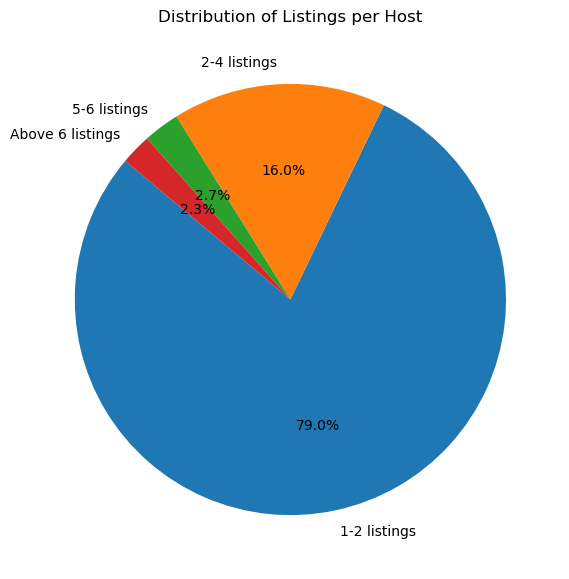

In [129]:
# Count the number of listings per host and plot a pie chart
host_listings_count = df['host_id'].value_counts().reset_index()
host_listings_count.columns = ['host_id', 'listings_count']

bins = [0, 2, 4, 6, float('inf')]
labels = ['1-2 listings', '2-4 listings', '5-6 listings', 'Above 6 listings']

host_listings_count['range'] = pd.cut(host_listings_count['listings_count'], bins=bins, labels=labels, right=False)

range_counts = host_listings_count['range'].value_counts().sort_index()

plt.figure(figsize=(10, 7))
plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Listings per Host')
plt.show()

### Data Preparation

In [130]:
data=df.copy()

First we will check the number of missing values and then filter out irrelevant columns

In [131]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
missing_values_per_column = numerical_columns.isnull().sum()
print(missing_values_per_column)

id                                    0
scrape_id                             0
host_id                               0
host_acceptance_rate              31253
host_listings_count                  14
host_total_listings_count            14
neighbourhood_group_cleansed      31253
latitude                              0
longitude                             0
accommodates                          0
bathrooms                            97
bedrooms                             35
beds                                 59
square_feet                       30869
price                                 0
weekly_price                      23823
monthly_price                     24620
security_deposit                  14397
cleaning_fee                       6974
guests_included                       0
minimum_nights                        0
maximum_nights                        0
has_availability                  31253
availability_30                       0
availability_60                       0


In [132]:
categorical_columns = data.select_dtypes(include=['object'])
missing_values_per_column = categorical_columns.isnull().sum()
print(missing_values_per_column)

listing_url                             0
last_scraped                            0
name                                    7
summary                               836
space                                9387
description                            15
experiences_offered                     0
neighborhood_overview               12678
notes                               17438
transit                             13089
access                              12179
interaction                         12991
house_rules                          9206
thumbnail_url                        4758
medium_url                           4758
picture_url                             0
xl_picture_url                       4758
host_url                                0
host_name                              14
host_since                             14
host_location                         172
host_about                          11629
host_response_time                   5561
host_response_rate                

### Remove irrelevant columns


In [133]:
# Select columns that contain 'url', 'availability', 'scrape' or 'calendar' and drop them 

keywords_to_drop = ['url', 'availability', 'scrape','calendar']

columns_to_drop = [col for col in data.columns if any(keyword in col.lower() for keyword in keywords_to_drop)]

print(columns_to_drop)

data.drop(columns=columns_to_drop, inplace=True)

print(len(data.columns))


['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped']
78


In [134]:
#drop columns with high rate of missing values
missing_percentage = data.isna().sum() / len(data) * 100

columns_high_null = missing_percentage[missing_percentage > 50].index.tolist()

print(columns_high_null)

data.drop(columns=columns_high_null, inplace=True)

print(len(data.columns))

['notes', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license']
71


In [135]:
# We expect the state to be CA in all rows, we will filter out the rows where it isn't
unique_state_counts = data['state'].value_counts()

print(unique_state_counts)

CA    31242
ca        5
Ca        2
TX        1
NY        1
DC        1
Name: state, dtype: int64


In [136]:
# remove rows where state is TX DC and NY as we are focusing on CA apartments
states_to_remove = ['TX', 'DC', 'NY']

data.drop(data[data['state'].isin(states_to_remove)].index, inplace=True)

In [137]:
# removing columns of type object that won't be relevant for feature engineering
text_cols=['neighborhood_overview','transit','access','interaction', 'house_rules','host_name','host_since','host_location',
           'host_about','host_response_time','host_neighbourhood','host_listings_count','space','experiences_offered',
           'host_verifications','host_has_profile_pic','neighbourhood','street', 'state','zipcode','market','smart_location',
           'country_code','neighbourhood_cleansed','country', 'requires_license','jurisdiction_names','instant_bookable',
           'require_guest_profile_picture','require_guest_phone_verification']

data.drop(columns=text_cols, inplace=True)


In [138]:
len(data.columns)

41

In [139]:
# removing other irrelevant numeric columns:
text_cols=['security_deposit' ,'extra_people','first_review', 'last_review','id','host_id','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
           'review_scores_value','calculated_host_listings_count','reviews_per_month']
data.drop(columns=text_cols, inplace=True)

In [140]:
len(data.columns)

27

We want to check if we have missing values in the city column

In [141]:
data['city'].isna().value_counts()

False    31239
True        11
Name: city, dtype: int64

In [142]:
# Check if the rows where city is null are actually in LA by the longitude and latitude

# the geographic boundaries of Los Angeles
LA_NORTH = 34.3373
LA_SOUTH = 33.7037
LA_WEST = -118.6682
LA_EAST = -118.1553

null_city_mask = data['city'].isna()

null_city_data = data[null_city_mask]

def is_in_la(row):
    return (LA_SOUTH <= row['latitude'] <= LA_NORTH) and (LA_WEST <= row['longitude'] <= LA_EAST)

null_city_data['is_in_la'] = null_city_data.apply(is_in_la, axis=1)

null_city_data[null_city_data['is_in_la']]


C:\Users\chenl\AppData\Local\Temp\ipykernel_26948\4029437675.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_city_data['is_in_la'] = null_city_data.apply(is_in_la, axis=1)


,name,summary,description,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,city,latitude,longitude,...,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy,is_in_la
2945,2 bedroom- Spacious Apartment with Private Par...,You’ll relax in this Large spacious Clean apar...,You’ll relax in this Large spacious Clean apar...,100%,f,4.0,t,NaN,34.023050,-118.197729,...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",95.0,50.0,1,4,120,3,100.0,moderate,True
8247,Private (w2) full-bed room,Conveniently located by metro station in East ...,Conveniently located by metro station in East ...,100%,f,9.0,t,NaN,34.090260,-118.295505,...,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",27.0,30.0,1,1,1125,30,88.0,strict,True
9573,Beautiful Home in Encino. 15 Min from Everything!,This beautiful Encino home is close to the bea...,This beautiful Encino home is close to the bea...,NaN,f,1.0,t,NaN,34.176705,-118.519959,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",225.0,125.0,1,2,5,2,100.0,flexible,True
10450,Stylish 1 Bedroom in Playa Vista,Spend your vacation or business trip in my bri...,Spend your vacation or business trip in my bri...,NaN,f,1.0,f,NaN,33.974110,-118.420596,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",199.0,49.0,1,12,1125,0,NaN,strict,True
18368,Hollywood Pool Home w/ Pool House!!,BEAUTIFUL 4 BEDROOM POOL HOME WALKING DISTANCE...,BEAUTIFUL 4 BEDROOM POOL HOME WALKING DISTANCE...,100%,f,3.0,t,NaN,34.162633,-118.363057,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",450.0,250.0,9,3,1125,5,90.0,strict,True
22598,Vacation Pad,Lovely Furnished Suite located in the middle o...,Lovely Furnished Suite located in the middle o...,0%,f,2.0,f,NaN,34.004598,-118.477511,...,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",129.0,110.0,1,4,90,0,NaN,strict,True
23538,Loft style condo in Sherman Oaks,Hey guys! I've got a cool loft style modern 3 ...,Hey guys! I've got a cool loft style modern 3 ...,NaN,f,1.0,f,NaN,34.156720,-118.429099,...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",60.0,5.0,1,1,365,0,NaN,moderate,True
23616,Comfortable bedroom/bath in Sherman Oaks,"Hi travelers, I am renting out my single room ...","Hi travelers, I am renting out my single room ...",NaN,f,1.0,f,NaN,34.152767,-118.461604,...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",88.0,NaN,1,1,1125,0,NaN,flexible,True
26286,BRAND NEW-Light & Beautiful Studio,"Brand new listing! A stunning, high ceiling st...","Brand new listing! A stunning, high ceiling st...",100%,t,1.0,f,NaN,33.987696,-118.458997,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",129.0,70.0,1,1,1125,26,98.0,strict,True
31125,Rooms per month@Home Away From Home,"Brimming with personality, this house features...","Brimming with personality, this house features...",100%,t,5.0,t,NaN,34.169825,-118.643496,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",68.0,NaN,1,1,1125,10,92.0,strict,True


We can see that 10 out of the 11 null rows are actually in LA so we can fill the city to be LA and not null

In [143]:
# Find rows that are within LA and have a null city
la_null_city_indices = null_city_data[null_city_data['is_in_la']].index

# Replace null with "Los Angeles" 
data.loc[la_null_city_indices, 'city'] = "Los Angeles"

data['city'].loc[la_null_city_indices]

2945     Los Angeles
8247     Los Angeles
9573     Los Angeles
10450    Los Angeles
18368    Los Angeles
22598    Los Angeles
23538    Los Angeles
23616    Los Angeles
26286    Los Angeles
31125    Los Angeles
Name: city, dtype: object

In [144]:
#verify the change
data['city'].isna().value_counts()

False    31249
True         1
Name: city, dtype: int64

In [145]:
# drop the remaining null row for further analysis 
data=data.dropna(subset=['city'])

Now after filling the null values we want to filter 'city' so we only have data from LA in our analysis

In [146]:
# Normalize the city names to lowercase and filter rows that contain 'los angeles'
data['city'] = data['city'].str.lower()

data = data[data['city'].str.contains('los angeles')]

unique_la_counts = data['city'].value_counts()

print(unique_la_counts, "---sum of all LA rows:",unique_la_counts.sum())


los angeles                                  19409
los angeles county                              47
los angeles                                     28
downtown los angeles                             7
west los angeles                                 5
venice, los angeles                              4
east los angeles                                 4
los angeles, california, us                      4
san pedro, los angeles                           2
hollywood, los angeles                           2
sherman oaks, los angeles                        2
los feliz, los angeles                           2
san pedro los angeles                            1
los angeles, studio city, tujunga village        1
los angeles, studio city                         1
woodland hills, los angeles                      1
toluca lake (los angeles area)                   1
los angeles (north hollywood)                    1
venice , los angeles                             1
venice (los angeles)           

In [147]:
# drop the city column 
data.drop(columns=['city'], inplace=True)

In [148]:
len(data.columns)

26

In [149]:
data.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
count,19545.000000,19552.000000,19552.000000,19552.000000,19487.000000,19533.000000,19523.000000,19552.000000,15445.000000,19552.000000,19552.000000,1.955200e+04,19552.000000,14937.000000
mean,5.146227,34.075816,-118.358395,3.384206,1.371812,1.296729,1.881063,164.744579,72.713111,1.707907,3.068484,3.302193e+05,21.026238,94.038160
std,19.820193,0.062203,0.087781,2.445915,0.810982,0.958117,1.569772,353.803880,66.085707,1.452553,8.026341,2.659944e+07,37.846090,8.084227
min,0.000000,33.706907,-118.803505,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,20.000000
25%,1.000000,34.044676,-118.427068,2.000000,1.000000,1.000000,1.000000,70.000000,30.000000,1.000000,1.000000,3.000000e+01,1.000000,92.000000
50%,2.000000,34.074218,-118.348309,2.000000,1.000000,1.000000,1.000000,100.000000,55.000000,1.000000,2.000000,1.125000e+03,6.000000,96.000000
75%,4.000000,34.103899,-118.292538,4.000000,1.500000,2.000000,2.000000,160.000000,99.000000,2.000000,3.000000,1.125000e+03,24.000000,100.000000
max,632.000000,34.610366,-117.760295,16.000000,8.000000,10.000000,16.000000,10000.000000,1000.000000,16.000000,365.000000,2.147484e+09,532.000000,100.000000


### Feature engineering

### Creating fetures of the length of the name ,summery and description

In [150]:

# Calculate the length of each string in the 'name', 'summary' and 'description' column and create a length column
data['name_length'] = data['name'].str.len()

data['summary_length'] = data['summary'].str.len()

data['description_length'] = data['description'].str.len()

#drop the original columns from the data set
data.drop(columns=['name', 'summary', 'description'], inplace=True)


In [151]:
# calculate mean of each column
mean_name_length = data['name_length'].mean()
mean_summary_length = data['summary_length'].mean()
mean_description_length = data['description_length'].mean()

# Fill Nan values with the mean 
data['name_length'] = data['name_length'].fillna(mean_name_length)
data['summary_length'] = data['summary_length'].fillna(mean_summary_length)
data['description_length'] = data['description_length'].fillna(mean_description_length)

# verify the changes
data[['name_length', 'summary_length', 'description_length']].head(10)


,name_length,summary_length,description_length
4,25.0,229.0,229.0
5,35.0,209.0,209.0
6,11.0,415.0,1000.0
7,28.0,36.0,504.0
8,29.0,230.0,230.0
9,35.0,248.0,1000.0
10,48.0,418.0,418.0
11,31.0,148.0,296.0
12,32.0,60.0,524.0
13,48.0,481.0,481.0


### Adding a feature that counts the number of ameneties available in the listing

In [152]:
data['amenities'] = data['amenities'].str.strip('{}').str.split(',')

data['num_of_amenities'] = data['amenities'].apply(len)

data[['amenities', 'num_of_amenities']]

,amenities,num_of_amenities
4,"[Internet, ""Wireless Internet"", Kitchen, ""Free...",9
5,"[TV, Internet, ""Wireless Internet"", Kitchen, ""...",8
6,"[Internet, ""Wireless Internet"", ""Free parking ...",9
7,"[TV, Internet, ""Wireless Internet"", Kitchen, W...",6
8,"[TV, ""Wireless Internet"", ""Air conditioning"", ...",19
...,...,...
31238,"[TV, ""Wireless Internet"", ""Air conditioning"", ...",16
31240,"[TV, ""Wireless Internet"", ""Air conditioning"", ...",28
31241,"[TV, ""Wireless Internet"", ""Air conditioning"", ...",11
31242,"[TV, ""Wireless Internet"", ""Air conditioning"", ...",16


In [153]:
data.drop(columns=['amenities'], inplace=True )

### host_response_rate - turning into a float type and fixing the scale

In [154]:
# Remove the '%' sign and convert to float
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float')

data['host_response_rate'] = data['host_response_rate'] / 100.0

# Replace Nan values with the mean
mean_host_response_rate = data['host_response_rate'].mean()
data['host_response_rate'] = data['host_response_rate'].fillna(mean_host_response_rate)

In [155]:
# Verify that there are no more Nan values
print("Number of nans:",data['host_response_rate'].isna().sum())

print(data['host_response_rate'].head())

Number of nans: 0
4    0.938128
5    1.000000
6    0.960000
7    0.960000
8    0.938128
Name: host_response_rate, dtype: float64


### Turning into boolean format - host_is_superhost & host_identity_verified & is_location_exact            

In [156]:
# first we will fill Nan with the most common value using mode:
data['host_is_superhost'] = data['host_is_superhost'].fillna(data['host_is_superhost'].mode()[0])
data['host_identity_verified'] = data['host_identity_verified'].fillna(data['host_identity_verified'].mode()[0])
data['is_location_exact'] = data['is_location_exact'].fillna(data['is_location_exact'].mode()[0])

          
# Verify 
print(data[['host_is_superhost', 'host_identity_verified', 'is_location_exact']].isna().sum())

host_is_superhost         0
host_identity_verified    0
is_location_exact         0
dtype: int64


In [157]:
print('Unique values in host_is_superhost:', data['host_is_superhost'].unique())
print('Unique values in host_identity_verified:', data['host_identity_verified'].unique())
print('Unique values in is_location_exact:', data['is_location_exact'].unique())


Unique values in host_is_superhost: ['f' 't']
Unique values in host_identity_verified: ['t' 'f']
Unique values in is_location_exact: ['t' 'f']


In [158]:
# Convert 'host_is_superhost' and 'host_identity_verified' from 't', 'f' to True, False
data['host_is_superhost'] = data['host_is_superhost'].map({'t': True, 'f': False})
data['host_identity_verified'] = data['host_identity_verified'].map({'t': True, 'f': False})
data['is_location_exact'] = data['is_location_exact'].map({'t': True, 'f': False})

# Verify
data[['host_is_superhost', 'host_identity_verified', 'is_location_exact']].head()

,host_is_superhost,host_identity_verified,is_location_exact
4,False,True,True
5,False,False,True
6,True,True,True
7,False,True,True
8,False,True,True


### Filling numerical missing values with the mean of the column

In [159]:
total_listings_mean = data['host_total_listings_count'].mean()
bathrooms_mean = data['bathrooms'].mean()
bedrooms_mean = data['bedrooms'].mean()
beds_mean= data['beds'].mean()
cleaning_fee_mean= data['cleaning_fee'].mean()
review_scores_rating_mean= data['review_scores_rating'].mean()


data['host_total_listings_count'] = data['host_total_listings_count'].fillna(total_listings_mean)
data['bathrooms'] = data['bathrooms'].fillna(bathrooms_mean)
data['bedrooms'] = data['bedrooms'].fillna(bedrooms_mean)
data['beds']= data['beds'].fillna(beds_mean)
data['cleaning_fee']= data['cleaning_fee'].fillna(cleaning_fee_mean)
data['review_scores_rating']= data['review_scores_rating'].fillna(review_scores_rating_mean)

In [160]:
data.isnull().sum()

host_response_rate           0
host_is_superhost            0
host_total_listings_count    0
host_identity_verified       0
latitude                     0
longitude                    0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
price                        0
cleaning_fee                 0
guests_included              0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating         0
cancellation_policy          0
name_length                  0
summary_length               0
description_length           0
num_of_amenities             0
dtype: int64

We filled all the null values.

 ### Encoding catagorial features

cancellation_policy


In [161]:
data['cancellation_policy'].unique()

array(['flexible', 'moderate', 'strict', 'super_strict_60'], dtype=object)

Given that cancellation_policy has an inherent order from more flexible to more strict, it is better to use ordinal encoding instead of one-hot encoding.

In [162]:
cancellation_policy_mapping = {
    'flexible': 0,
    'moderate': 1,
    'strict': 2,
    'super_strict_60': 3
}
data['cancellation_policy_encoded'] = data['cancellation_policy'].map(cancellation_policy_mapping)


In [163]:
data['cancellation_policy_encoded'].unique()

array([0, 1, 2, 3], dtype=int64)

bed_type

In [164]:
data['bed_type'].unique()

array(['Real Bed', 'Airbed', 'Futon', 'Couch', 'Pull-out Sofa'],
      dtype=object)

In [165]:
bed_type_dummies = pd.get_dummies(data['bed_type'], prefix='bed_type', drop_first=True)
data = pd.concat([data, bed_type_dummies], axis=1)

room_type

In [166]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [167]:
room_type_dummies = pd.get_dummies(data['room_type'], prefix='room_type', drop_first=True)
data = pd.concat([data, room_type_dummies], axis=1)

property_type

In [168]:
data['property_type'].unique()

array(['Apartment', 'House', 'Guesthouse', 'Bed & Breakfast', 'Other',
       'Loft', 'Dorm', 'In-law', 'Hostel', 'Condominium', 'Townhouse',
       'Bungalow', 'Cabin', 'Camper/RV', 'Villa', 'Guest suite',
       'Treehouse', 'Serviced apartment', 'Plane', 'Tent',
       'Boutique hotel', 'Yurt', 'Vacation home', 'Castle', 'Chalet',
       'Boat', 'Hut', 'Earth House', 'Casa particular', 'Cave'],
      dtype=object)

Since there are many catagories for property_type we will clasiffy the low frequency types as "other" to reduce the amount of catagories

In [170]:
# Calculate the frequency of each property type
frequency = data['property_type'].value_counts()

# Create a dictionary to map property types to their new categories
def classify_by_frequency(property_type, frequency, threshold=100):
    if frequency[property_type] <= threshold:
        return 'Other'
    else:
        return property_type

# Map each property type to its new category based on the frequency
data['property_type'] = data['property_type'].apply(lambda x: classify_by_frequency(x, frequency))

data['property_type'].value_counts()

Apartment          9734
House              7167
Other               582
Loft                468
Condominium         420
Guesthouse          348
Townhouse           337
Bungalow            302
Bed & Breakfast     194
Name: property_type, dtype: int64

In [171]:
# Perform one-hot encoding on the 'property_category' column
property_category_dummies = pd.get_dummies(data['property_type'], prefix='category',drop_first=True)

data = pd.concat([data, property_category_dummies], axis=1)

In [172]:
# drop the original catagorial columns
columns_to_drop = ['cancellation_policy', 'bed_type', 'room_type', 'property_type']

data.drop(columns=columns_to_drop, inplace=True)

In [173]:
len(data.columns)

37

In [174]:
## other versions to check: dtop the ptoprty type colimn
## keep all dummy property types anf use pca later to reduce dimentions

### Since the predicted variable is the price we will examine it's distribution

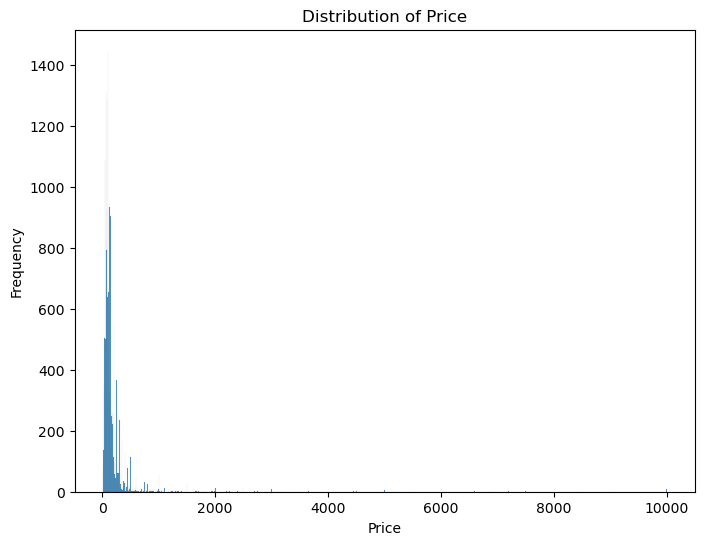

In [175]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

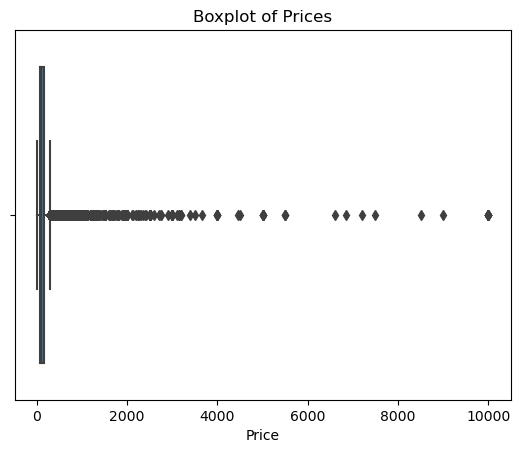

In [176]:
# boxplot of the price
sns.boxplot(x=data['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

The price variable exhibits a right-skewed distribution, indicating positive skewness. To address this skewness, a log transformation will be applied to make the distribution less skewed, which will facilitate easier interpretation and enhance the quality of statistical analyses.

To avoid issues with division by zero we will use a log(1+x) transformation 

In [177]:
data['log_price'] = np.log(data['price'] + 1)

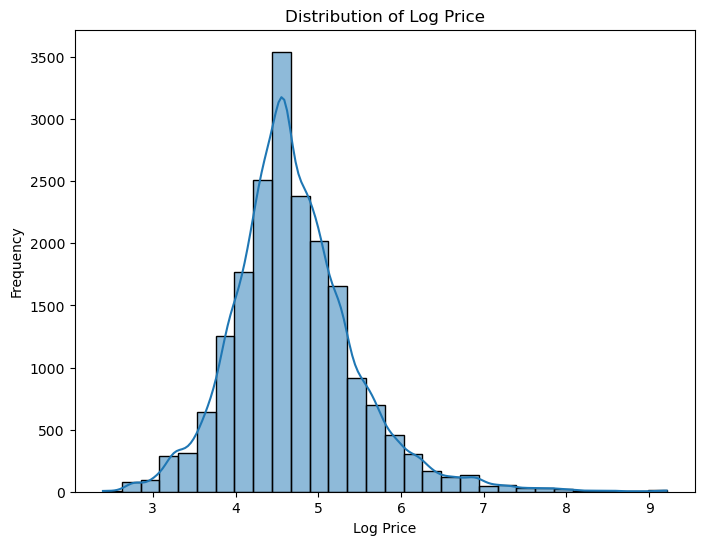

In [178]:
plt.figure(figsize=(8, 6))
sns.histplot(data['log_price'], bins=30, kde=True)
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

The predicted variable 'price' displays high variance.To effectively address the presence of outliers in this variable, z-scores will be utilized.

In [179]:
# Calculate mean and standard deviation 
mean_price = data['log_price'].mean()
std_price = data['log_price'].std()

# Calculate Z-scores for each data point
data['log_price_zscore'] = (data['log_price'] - mean_price) / std_price

threshold = 3

# Identify the outliers 
outliers = data[(data['log_price_zscore'] > threshold) | (data['log_price_zscore'] < -threshold)]

data = data[(data['log_price_zscore'] <= threshold) & (data['log_price_zscore'] >= -threshold)]
data.drop('log_price_zscore', axis=1, inplace=True)

data['log_price'].describe()

count    19332.000000
mean         4.680082
std          0.684427
min          2.564949
25%          4.262680
50%          4.615121
75%          5.062595
max          6.957497
Name: log_price, dtype: float64

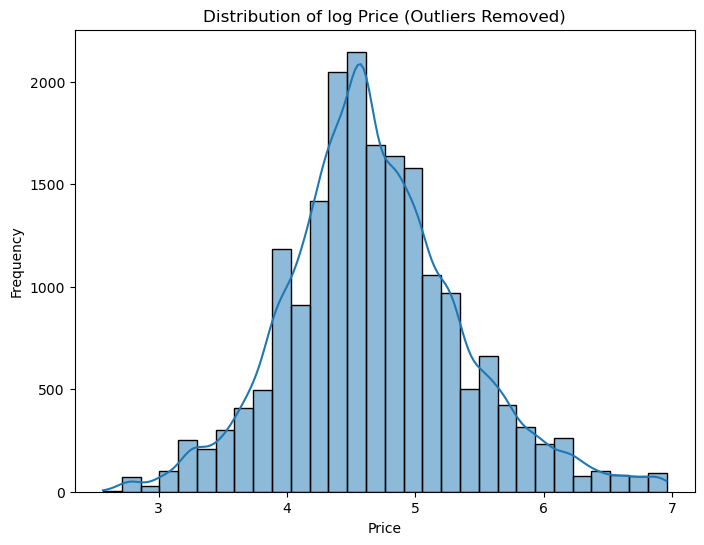

In [180]:
plt.figure(figsize=(8, 6))
sns.histplot(data['log_price'], bins=30, kde=True)
plt.title('Distribution of log Price (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

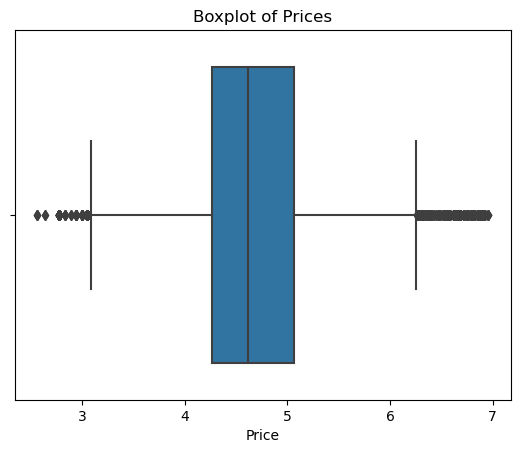

In [181]:
# boxplot of the log_price
sns.boxplot(x=data['log_price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

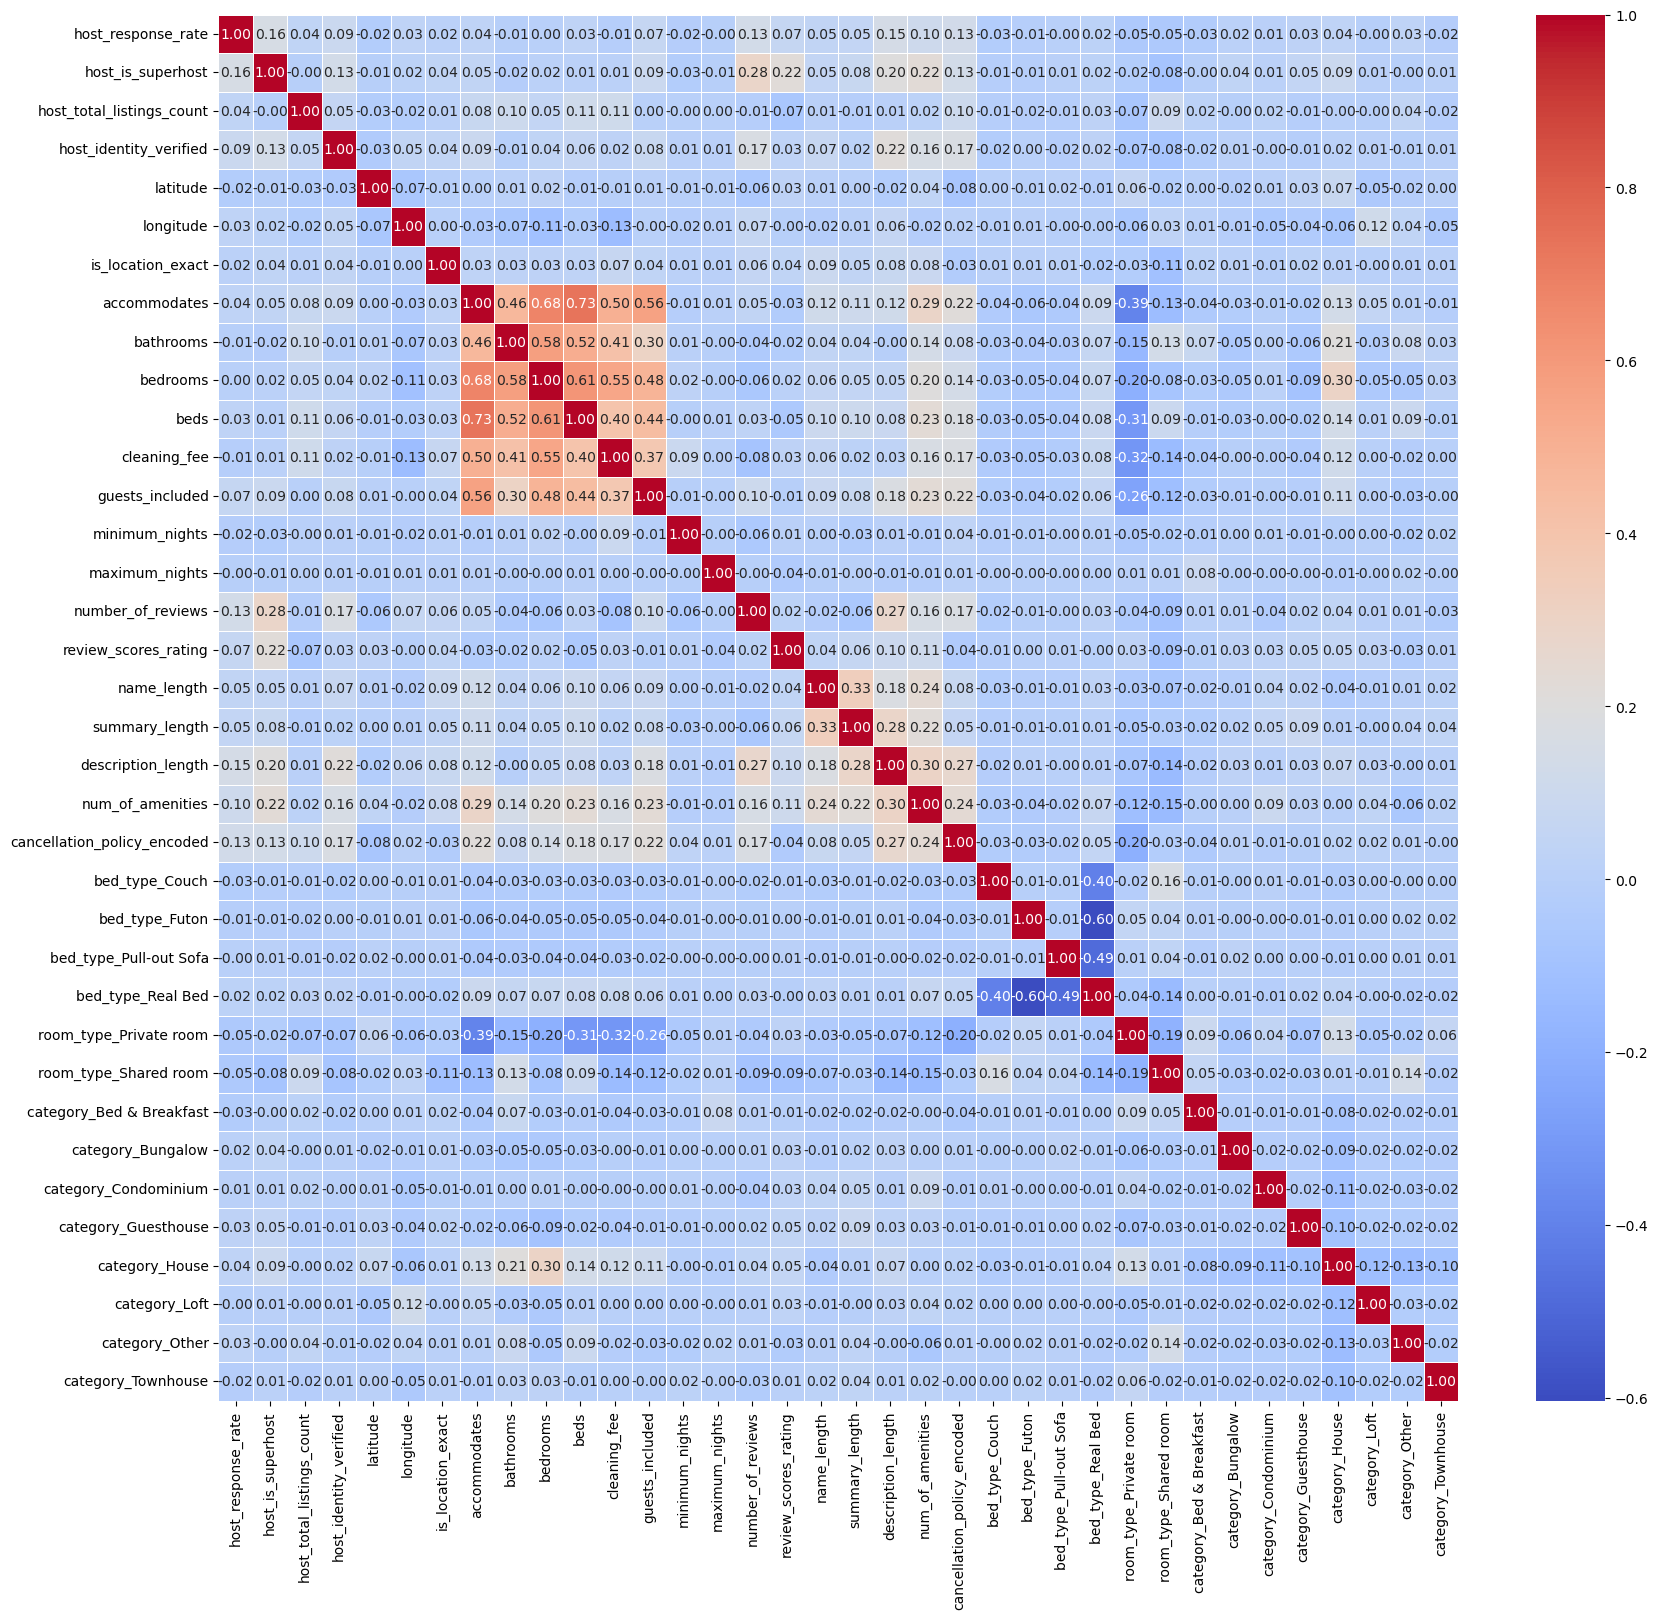

In [182]:
df1 = data.drop(['log_price', 'price'], axis=1)
correlation_matrix = df1.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

The correlation table shows that accommodates is highly correlated with both bedrooms and beds, this feature will be taken out of data to avoid multicollinearity, which can skew the estimates of model parameters and make the model unstable.

In [183]:
data = data.drop(['accommodates'],axis=1)

### Modeling

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

In [189]:
X = data.drop(['log_price','price'],axis=1)
y = data['log_price']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [190]:
#Initialzing a dictionary to hold all metrics in order to compare and evaluate the models the end
metrics_dict = {}


In [191]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
host_response_rate,19332.0,0.938946,1.554609e-01,0.000000,0.938128,1.000000,1.000000,1.000000e+00
host_total_listings_count,19332.0,5.084162,1.957407e+01,0.000000,1.000000,2.000000,4.000000,6.320000e+02
latitude,19332.0,34.075590,6.215888e-02,33.706907,34.044598,34.073731,34.103732,3.461037e+01
longitude,19332.0,-118.357802,8.749385e-02,-118.666082,-118.426530,-118.347947,-118.292009,-1.177603e+02
bathrooms,19332.0,1.340125,7.201072e-01,0.000000,1.000000,1.000000,1.500000,8.000000e+00
bedrooms,19332.0,1.266948,8.910737e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+01
beds,19332.0,1.847121,1.500687e+00,1.000000,1.000000,1.000000,2.000000,1.600000e+01
price,19332.0,138.497000,1.274612e+02,12.000000,70.000000,100.000000,157.000000,1.050000e+03
cleaning_fee,19332.0,70.606824,5.171342e+01,0.000000,35.000000,72.713111,80.000000,8.480000e+02
guests_included,19332.0,1.693720,1.406760e+00,1.000000,1.000000,1.000000,2.000000,1.600000e+01


Applying StandardScaler to the linear regressions as they rely on the distance between data points. It's applied since the features have different units and it ensures that no feature dominates due to its larger magnitude.

In [192]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Linear Regression 

In [193]:
linear = LinearRegression()

Linear Regression

In [194]:
linear.fit(x_train, y_train)
y_pred=linear.predict(x_test)

linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test,y_pred)

print("Linear RMSE:", linear_rmse)
print("Linear R2:", linear_r2)
print("Linear MAE:", linear_mae)

Linear RMSE: 0.3966567653959947
Linear R2: 0.6704706060191021
Linear MAE: 0.29068366948630187


Linear Regression scaled

In [195]:
linear.fit(x_train_scaled, y_train)
y_pred=linear.predict(x_test_scaled)

linear_rmse = np.sqrt(mean_squared_error(y_test, linear.predict(x_test_scaled)))
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test,y_pred)


print("Linear RMSE:", linear_rmse)
print("Linear R2:", linear_r2)
print("Linear MAE:", linear_mae)

#save metrics
metrics_dict['Linear Regression'] = {'RMSE': linear_rmse, 'R²': linear_r2, 'MAE': linear_mae}

Linear RMSE: 0.39665676539443123
Linear R2: 0.6704706060216999
Linear MAE: 0.2906836694781188


The scaling didn't help much in improving the linear regression  model

## Ridge Regression

In [196]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_model = Ridge()

#finding the best alpha values and using 5-fold cross validation 
ridge_cv = GridSearchCV(ridge_model, param_grid, cv=5)

Ridge Regression

In [197]:
ridge_cv.fit(x_train, y_train)
best_ridge_model = ridge_cv.best_estimator_
ridge_preds = best_ridge_model.predict(x_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
ridge_r2 = r2_score(y_test, ridge_preds)
ridge_mae = mean_absolute_error(y_test,ridge_preds)


print("Ridge RMSE:", ridge_rmse)
print("Ridge R2:", ridge_r2)
print("Ridge MAE:", ridge_mae)
print("Best alpha for Ridge:", ridge_cv.best_params_)

#save metrics
metrics_dict['Ridge Regression'] = {'RMSE': ridge_rmse, 'R²': ridge_r2, 'MAE': ridge_mae}

C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.11168e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.85382e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.47896e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.44151e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

Ridge RMSE: 0.39665634435038766
Ridge R2: 0.6704713056004137
Ridge MAE: 0.290689145739041
Best alpha for Ridge: {'alpha': 1}


C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.61731e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.44106e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.58046e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.641e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211:

Ridge Regression scaled

In [198]:
ridge_cv.fit(x_train_scaled, y_train)
best_ridge_model = ridge_cv.best_estimator_
ridge_preds = best_ridge_model.predict(x_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
ridge_r2 = r2_score(y_test, ridge_preds)
ridge_mae = mean_absolute_error(y_test,ridge_preds)


print("Ridge RMSE:", ridge_rmse)
print("Ridge R2:", ridge_r2)
print("Ridge MAE:", ridge_mae)

print("Best alpha for Ridge:", ridge_cv.best_params_)

Ridge RMSE: 0.39666068843908686
Ridge R2: 0.6704640877165375
Ridge MAE: 0.2906856782084214
Best alpha for Ridge: {'alpha': 10}


The scaling didn't help much in improving the ridge regression  model

## Lasso Regression

Lasso Regression

In [199]:
lasso_param_grid = {'alpha': [0.1, 1, 10, 100]}
lasso_model = Lasso()

#finding the best alpha values and using 5-fold cross validation 
lasso_cv = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_cv.fit(x_train, y_train)
best_lasso_model = lasso_cv.best_estimator_
lasso_preds = best_lasso_model.predict(x_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
lasso_r2 = r2_score(y_test, lasso_preds)
lasso_mae = mean_absolute_error(y_test,lasso_preds)

print("Lasso RMSE:", lasso_rmse)
print("Lasso R2:", lasso_r2)
print("Lasso MAE:", lasso_mae)

print("Best alpha for Lasso:", lasso_cv.best_params_)

Lasso RMSE: 0.5231614830942211
Lasso R2: 0.42676070639421304
Lasso MAE: 0.39215704372035926
Best alpha for Lasso: {'alpha': 0.1}


Lasso Regression scaled

In [200]:
lasso_param_grid = {'alpha': [0.1, 1, 10, 100]}
lasso_model = Lasso()

#finding the best alpha values and using 5-fold cross validation 
lasso_cv = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_cv.fit(x_train_scaled, y_train)
best_lasso_model = lasso_cv.best_estimator_
lasso_preds = best_lasso_model.predict(x_test_scaled)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
lasso_r2 = r2_score(y_test, lasso_preds)
lasso_mae = mean_absolute_error(y_test,lasso_preds)


print("Lasso RMSE:", lasso_rmse)
print("Lasso R2:", lasso_r2)
print("Lasso MAE:", lasso_mae)

print("Best alpha for Lasso:", lasso_cv.best_params_)


#save metrics
metrics_dict['Lasso Regression'] = {'RMSE': lasso_rmse, 'R²': lasso_r2, 'MAE': lasso_mae}

Lasso RMSE: 0.4508976945999992
Lasso R2: 0.5741854891207625
Lasso MAE: 0.3383430773768677
Best alpha for Lasso: {'alpha': 0.1}


In the lasso regression the scaling performs better both in terms of error and explained variance.

## Desicion Tree Regression

In [201]:
dt = DecisionTreeRegressor()
kf = KFold(7, shuffle = True, random_state=0)
mse = cross_val_score(dt, X, y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
print("Root mean square error: " +str(round(avg_rmse,2)))

Root mean square error: 0.48


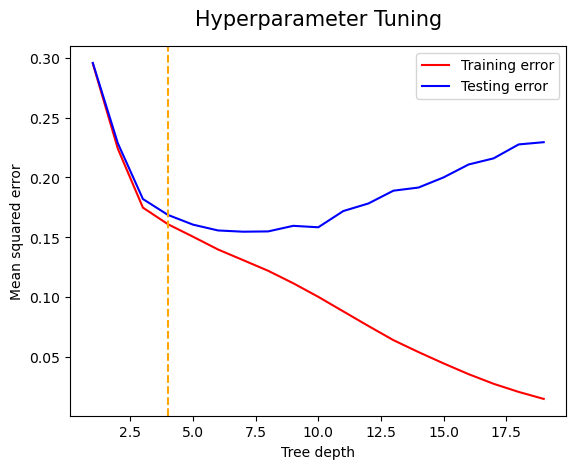

In [202]:
max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_train = DecisionTreeRegressor(max_depth=max_depth)
    model_train.fit(x_train, y_train)
    training_error.append(mean_squared_error(y_train, model_train.predict(x_train)))   

testing_error = []
for max_depth in max_depths:
    model_test = DecisionTreeRegressor(max_depth=max_depth)
    model_test.fit(x_train, y_train)
    testing_error.append(mean_squared_error(y_test, model_test.predict(x_test)))
    
plt.plot(max_depths, training_error, color='red', label='Training error')
plt.plot(max_depths, testing_error, color='blue', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=4, color='orange', linestyle='--')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

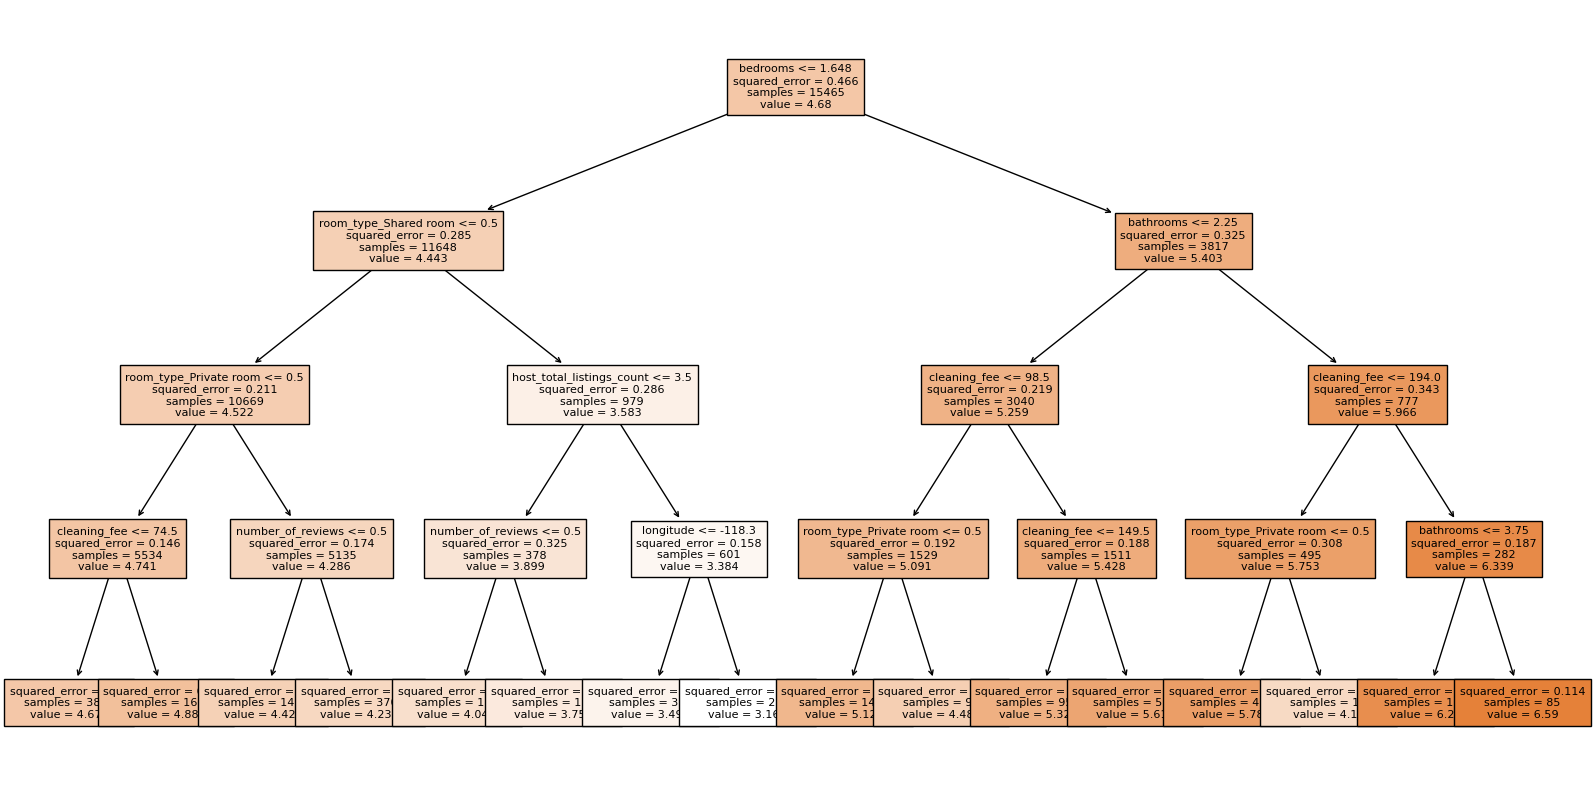

Root Mean Squared Error: 0.41
R-squared (R²) score: 0.65
MAE: 0.303728640568895


In [203]:
regressor = DecisionTreeRegressor(max_depth = 4,min_samples_leaf= 10, min_samples_split= 2)
model = regressor.fit(x_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(regressor, feature_names = x_train.columns.tolist() ,fontsize = 8, filled = True)
plt.show()

dt_rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
dt_r2 = r2_score(y_test, model.predict(x_test))
dt_mae = mean_absolute_error(y_test, model.predict(x_test))

print(f'Root Mean Squared Error: {dt_rmse:.2f}')
print(f'R-squared (R²) score: {dt_r2:.2f}')
print("MAE:", dt_mae)


#save metrics
metrics_dict['Decision Tree Regressor'] = {'RMSE': dt_rmse, 'R²': dt_r2, 'MAE': dt_mae}

### Random Forest Regression

Hyperparameter tuning using RandomizedSearchCV to find the best combination of hyperparameter values, and to maximize model performance.

In [207]:
param_dist = {
    'n_estimators': [10, 50, 100, 200,300],
    'max_depth': [5, 10, 15, 20, 25, 30,35],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'auto', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=0),
    param_distributions=param_dist,
    n_iter=10,  
    cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error'
)

random_search.fit(x_train, y_train)
print("Best hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\chenl\anaconda3\Lib\site-packages\

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


In [211]:
rmse_rf=[]
rf=RandomForestRegressor(n_estimators = 300, random_state=1, min_samples_leaf=1, min_samples_split= 5, max_depth= 30, max_features='sqrt')
kf = KFold(5, shuffle = True, random_state=1)

mse = cross_val_score(rf ,x_train,y_train, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_rf.append(avg_rmse)
r2 = cross_val_score(rf, x_train, y_train, scoring="r2", cv=kf)
avg_r2 = np.mean(r2)
mae = -cross_val_score(rf, x_train, y_train, scoring="neg_mean_absolute_error", cv=kf)
avg_mae = np.mean(mae)

print("Average rmse:",avg_rmse)
print("Average R²:", avg_r2)
print("Average mae:",avg_mae)


#save metrics
metrics_dict['Random Forest Regressor'] = {'RMSE': avg_rmse, 'R²': avg_r2, 'MAE': avg_mae}

Average rmse: 0.34267458040411364
Average R²: 0.7476145852185505
Average mae: 0.24671144256883631


### XGBoost

In [293]:
#hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [200, 300, 500],        
    'max_depth': [5, 7, 10],                 
    'learning_rate': [0.05, 0.1,],    
    'colsample_bytree': [0.5, 0.7],     
    'alpha': [0.5, 5],                                  
    'subsample': [0.6, 1] }

xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

random_search = RandomizedSearchCV(
    estimator=xg_reg, 
    param_distributions=param_grid, 
    n_iter=50,           
    scoring='neg_mean_squared_error', 
    cv=3,                 
    verbose=1, 
    random_state=42, 
    n_jobs=-1)

random_search.fit(x_train, y_train)

print(f"Best parameters: {random_search.best_params_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'subsample': 1, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'alpha': 0.5}


In [296]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=300,subsampl= 1, colsample_bytree=0.5, learning_rate=0.1,
                          max_depth=8, alpha=5)

xg_reg.fit(x_train, y_train)

y_pred = xg_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")


#save metrics
metrics_dict['XGB Regressor'] = {'RMSE': rmse, 'R²': r2, 'MAE': mae}

C:\Users\chenl\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:41:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "subsampl" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.3344189102228805
R²: 0.7657680779111584
MAE: 0.2374578135198664


### Neural Network - MLP Regressor

In [288]:
# Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'hidden_layer_sizes': [(50, 50), (100, 150), (150, 200)],
    'learning_rate_init': [0.001, 0.01, 0.1], 
    'alpha': [0.001, 0.01], 
    'solver': ['sgd', 'adam'],  
    'learning_rate': ['constant', 'adaptive'], 
    'max_iter': [5000, 10000] 
}

mlp = MLPRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=mlp, 
                                   param_distributions=param_distributions, 
                                   cv=3, 
                                   scoring='neg_mean_squared_error', 
                                   verbose=2, 
                                   n_jobs=-1,
                                   n_iter=50,  # Number of random combinations to try
                                   random_state=42)

random_search.fit(x_train_scaled, y_train)

print(f"Best parameters: {random_search.best_params_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chenl\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 753, in fit
 

Best parameters: {'solver': 'sgd', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (150, 200), 'alpha': 0.001}


In [291]:
mlp = MLPRegressor(solver='sgd',activation='relu',learning_rate_init=0.001,learning_rate='adaptive', alpha=0.01, 
                   hidden_layer_sizes=(150, 200),max_iter=5000,random_state=42)
mlp.fit(x_train_scaled, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(150, 200),
             learning_rate='adaptive', max_iter=5000, random_state=42,
             solver='sgd')

In [292]:
r2=mlp.score(x_test_scaled, y_test)
y_pred = mlp.predict(x_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"rmse: {rmse}")
print(f"R2: {r2}")
print(f"mae: {mae}")


#save metrics
metrics_dict['MLP Regressor'] = {'RMSE': rmse, 'R²': r2, 'MAE': mae}

rmse: 0.37008039989288355
R2: 0.7131488488827181
mae: 0.27034623646290157


### Evaluation

In [283]:
metrics_df = pd.DataFrame(metrics_dict).T  
print(metrics_df)

                             RMSE        R²       MAE
Linear Regression        0.396657  0.670471  0.290684
Ridge Regression         0.396656  0.670471  0.290689
Lasso Regression         0.450898  0.574185  0.338343
Decision Tree Regressor  0.410716  0.646697  0.303729
Random Forest Regressor  0.342675  0.747615  0.246711
XGB Regressor            0.334419  0.765768  0.237458
MLP Regressor            0.377342  0.701781  0.272952


<Figure size 1000x600 with 0 Axes>

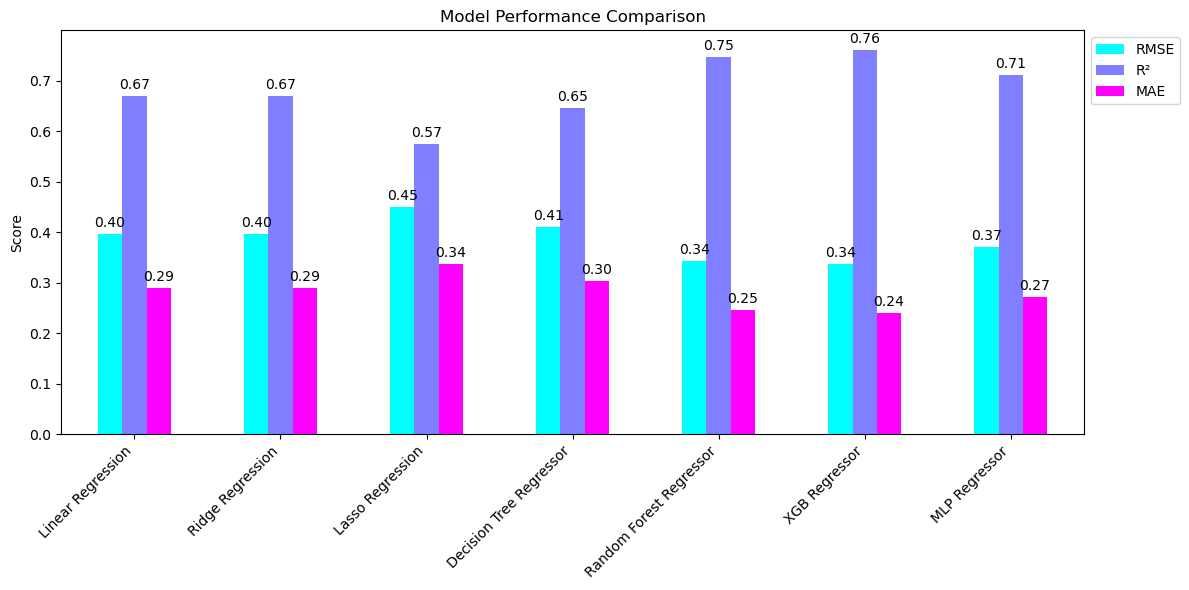

In [282]:
# plot the metrics of all model to evaluate which oe in the best preforming
plt.figure(figsize=(10, 6))

ax = metrics_df.plot(kind='bar', figsize=(12, 6),colormap='cool')

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

MAE (Mean Absolute Error) measures the average magnitude of the errors between predicted and actual values. . Lower MAE values indicate better model accuracy.

RMSE (Root mean squared error) quantifies the average deviation between predicted and actual values, with lower values indicating better model accuracy.

R2 represents the proportion of variance in the target variable explained by the model, ranging from 0 to 1, where higher values denote better model fit.

XGB Regressor is the best model as it has the highest R² (explains most variance) and the lowest MAE and RMSE. It balances accuracy and generalization well, Random Forest Regressor is a very close second, with performance nearly matching XGB.